In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isdir
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random

C:\Users\sipin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#input data
dataset = "HMP_Dataset/"

dir_name = [x for x in listdir(dataset) if "MODEL" not in x and isdir(dataset+x)]
data_dict = {}

for d_name in dir_name:
    total_files = []
    for f_name in listdir(dataset+d_name):
        cur_file = np.loadtxt(dataset+d_name+'/'+f_name,dtype=int)
        total_files.append(cur_file)
    data_dict[d_name] = total_files
label = list(data_dict.keys())

In [3]:

n_estimator=100
depth=10
testsize = 0.2
#====================================
#=^^^^Parameter^^^^^^^^^^^^^^========
#====================================
def kmeans_vq(seg_len,n_cluster):
    
    ###############################
    #segmentation of the vector####
    test_slice = []
    test_whole = []
    train_slice = []
    train_whole = []
    total = []
    testal = []
    train_y = []
    for k, arr in data_dict.items():
        test_y = []
        test_slice = []
        for cur in arr:
            whole = []
            tt = []
            lb = []
            for i in range(cur.shape[0]//seg_len):
                temp = cur[i*seg_len:(i+1)*seg_len].reshape(-1)
                tt.append(temp)
                lb.append(label.index(k))
                whole.append(temp)
            X_train, X_test, y_train, y_test = train_test_split(tt,lb,test_size=testsize)
            train_slice += X_train
            test_slice += X_test
            test_y += y_test
            train_y += y_train
            testal.append((np.asarray(X_test),k))
            
            
    ###############################
    #k means#######################
    kmeans = KMeans(n_clusters=n_cluster, random_state=np.random.randint(491212)).fit(train_slice)
    
    
    
    ################################
    #classification#################
    def convert(X, y, test_data,kmeans):
        for num, data in enumerate(test_data):
            y[num] = label.index(data[1])
            for j in kmeans.predict(data[0]):
                X[num, j] += 1
    clf = RandomForestClassifier(n_estimators=n_estimator, max_depth=depth, random_state=87412)
    
    X_test = np.zeros((len(testal), n_cluster))
    y_test = np.zeros(len(testal), dtype='int')
    
    convert(X_test, y_test, testal,kmeans)
    clf.fit(X_test, y_test)
    cm = confusion_matrix(y_test, clf.predict(X_test))
    print(cm)
    print(clf.score(X_test, y_test))
    return kmeans,clf,X_test,y_test,testal,cm


In [4]:
km,clf,x,y,ta,cm = kmeans_vq(24,28)

[[12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 86  0  2  1  0  0  1  0  1  7  4  0  0]
 [ 0  0 29  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 21  0 15  0  0  0  0  0  0  3  3  0  0]
 [ 0  0  0  0 83  0  0  0  0 16  1  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 87  0  0  2 12  0  0]
 [ 0  1  0  0  0  0  0  4 10  4  5  4  0  0]
 [ 0  0  0  0  4  0  0  0  0 93  3  0  0  0]
 [ 0  1  0  0  4  0  0  1  0  6 66 22  0  0]
 [ 0  3  0  0  1  0  0  2  0  6 20 70  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0 12  0]
 [ 0  4  0  0  0  0  0  0  0  1  3  3  0 89]]
0.7866507747318237


In [6]:
pd.DataFrame(cm,columns=label,index=[label])

X_test = np.zeros((len(ta), 28))
y_test = np.zeros(len(ta), dtype='int')
for num, data in enumerate(ta):
    y_test[num] = label.index(data[1])
    for j in km.predict(data[0]):
        X_test[num, j] += 1

C:\Users\sipin\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\sipin\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


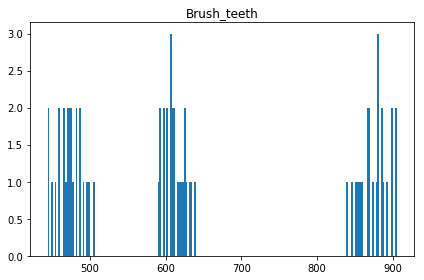

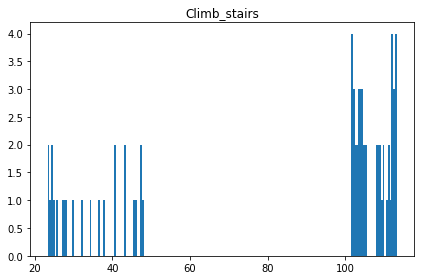

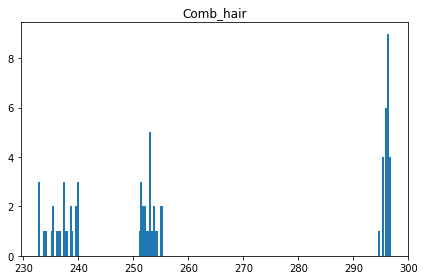

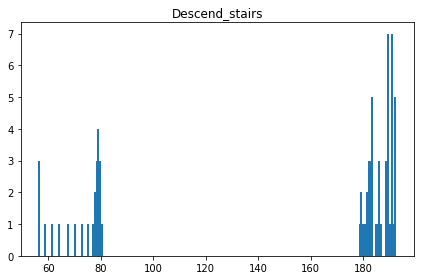

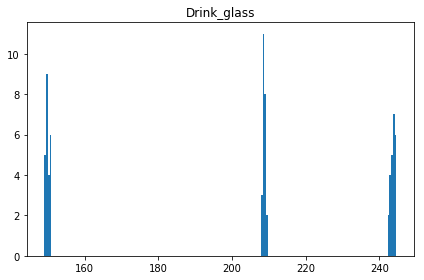

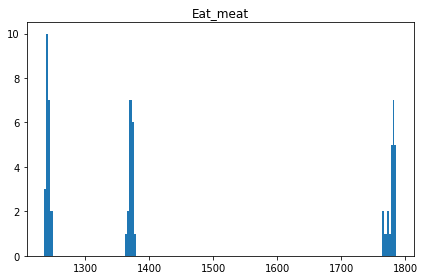

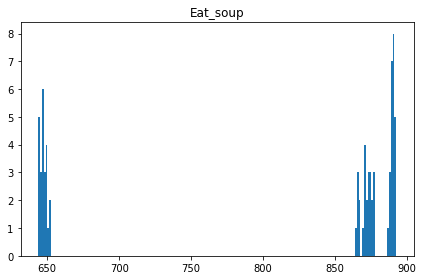

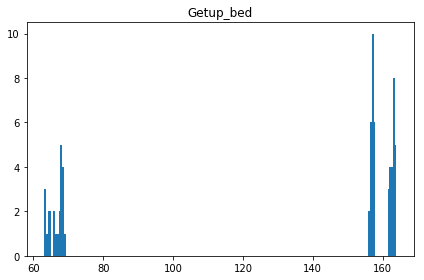

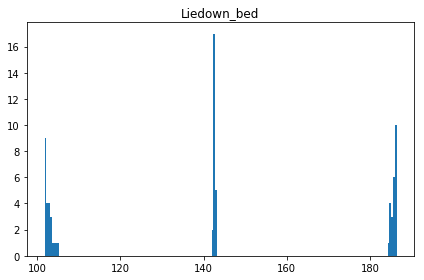

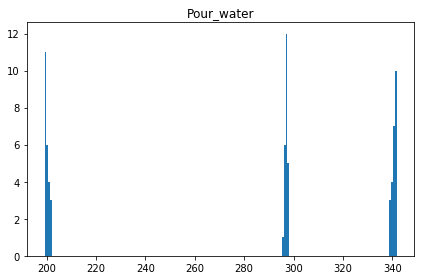

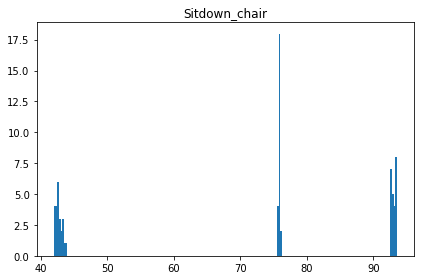

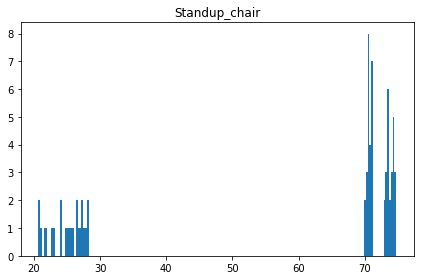

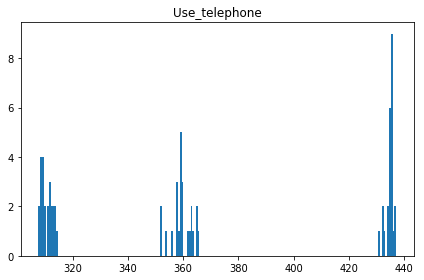

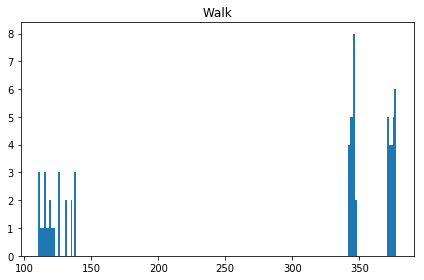

In [8]:
##########################
#generating histogram#####

#slicing:
d_dict = {}
choose = {}
s = set()
km.cluster_centers_[0]
for idx, i in enumerate(y):
    if i not in s:
        s.add(i)
        choose[i] = x[idx]
for j in choose.items():
    d_dict[j[0]] = np.zeros((1,72))
    for idx, k in enumerate(j[1]):
        d_dict[j[0]]+=k*km.cluster_centers_[idx]

for i in range(1,15):
    fig, axs = plt.subplots(sharey=True, tight_layout=True)

    # We can set the number of bins with the `bins` kwarg
    axs.hist(d_dict[i-1][0], bins=200)
    axs.set_title(label[i-1])
    fig.show()

In [7]:
# kmeans_vq(24,14)
# kmeans_vq(22,14)
# kmeans_vq(20,14)
# kmeans_vq(18,14)
# kmeans_vq(16,14)
# kmeans_vq(24,16)
# kmeans_vq(24,20)
# kmeans_vq(24,24)
# kmeans_vq(24,28)
# kmeans_vq(24,32)